# Sales Data Analysis

### Sample Superstore Dataset

**Tools Used:** Python, Pandas, Matplotlib, Seaborn  
**Objective:** Analyze retail sales data to identify sales trends, profitability patterns, and the impact of discounts on business performance.

In [24]:
# ------------------------------
# Import Required Libraries
# ------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")

In [25]:
# ------------------------------
# Load Dataset 
# ------------------------------

# Load dataset
df = pd.read_csv("../data/SampleSuperstore.csv")

# Preview the data
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [26]:
# ------------------------------
# Basic Data Understanding
# ------------------------------

# Shape of dataset
df.shape

# Dataset information
df.info()

# Statistical summary
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [27]:
# ------------------------------
# Data Cleaning & Preprocessing
# ------------------------------

# Check missing values
df.isnull().sum()

# Remove unnecessary column (Postal Code not useful for analysis)
df.drop(columns=['Postal Code'], inplace=True)

In [28]:
# Checking if Postal code is dropped or not
df.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


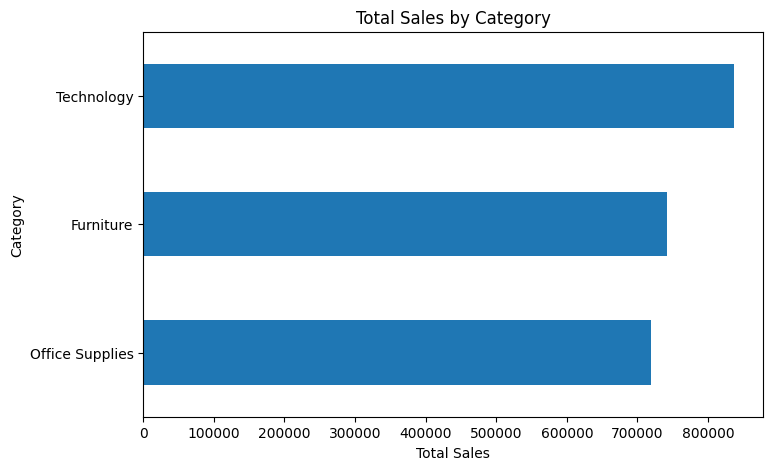

In [29]:
# ------------------------------
# Exploratory Data Analysis (EDA)
# ------------------------------

# Total Sales by Category
sales_by_category = df.groupby("Category")["Sales"].sum().sort_values()

plt.figure(figsize=(8,5))
sales_by_category.plot(kind="barh")
plt.title("Total Sales by Category")
plt.xlabel("Total Sales")
plt.ylabel("Category")
plt.show()

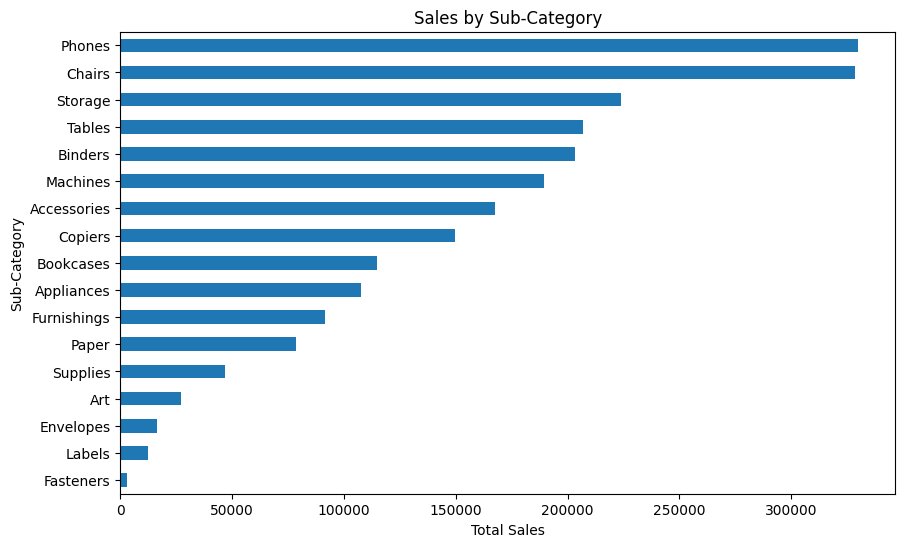

In [30]:
# Sales by Sub-Category
sales_by_subcategory = df.groupby("Sub-Category")["Sales"].sum().sort_values()

plt.figure(figsize=(10,6))
sales_by_subcategory.plot(kind="barh")
plt.title("Sales by Sub-Category")
plt.xlabel("Total Sales")
plt.ylabel("Sub-Category")
plt.show()

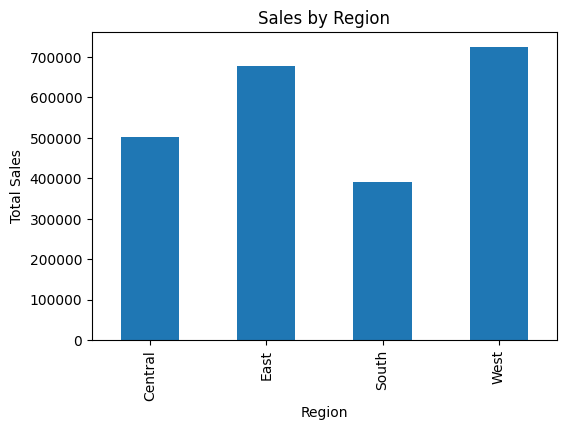

In [31]:
# Sales by Region
sales_by_region = df.groupby("Region")["Sales"].sum()

plt.figure(figsize=(6,4))
sales_by_region.plot(kind="bar")
plt.title("Sales by Region")
plt.ylabel("Total Sales")
plt.show()

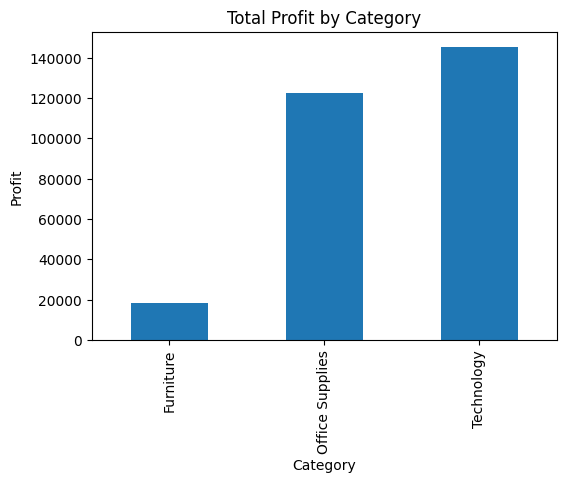

In [32]:
# Profit by Category (IMPORTANT)
profit_by_category = df.groupby('Category')['Profit'].sum()

plt.figure(figsize=(6,4))
profit_by_category.plot(kind='bar')
plt.title("Total Profit by Category")
plt.ylabel("Profit")
plt.show()

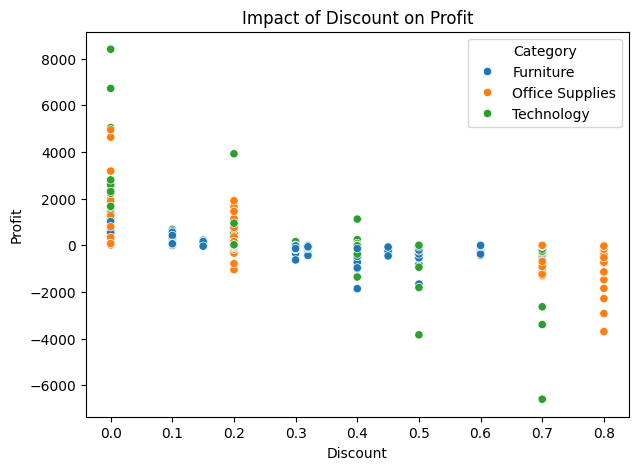

In [33]:
# Discount vs Profit Analysis (BUSINESS INSIGHT)
plt.figure(figsize=(7,5))
sns.scatterplot(
    data=df,
    x="Discount",
    y="Profit",
    hue="Category"
)
plt.title("Impact of Discount on Profit")
plt.show()

### Key Insights from Analysis

- Technology category generated the highest sales and profit
- Furniture showed lower profit despite high sales volume
- West region contributed the most to total sales
- Higher discounts were often associated with negative profit
- Phones and Chairs were top revenue-generating sub-categories

In [34]:
# Dataset Confirmation
print("Dataset Source: Kaggle - Sample Superstore Dataset")
print("Total Records:", df.shape[0])
print("Total Features:", df.shape[1])

Dataset Source: Kaggle - Sample Superstore Dataset
Total Records: 9994
Total Features: 12
